Average number of blobs per image: 2.0161290322580645
Average blob size: 10.27
Max number of blobs in an image: 7 (Image: C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\x86\01-Eleven\1a796f5783d52f98f7a0d589b7783d13-4.jpg)
Min number of blobs in an image: 0 (Image: C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\x86\01-Eleven\M88_promo_stills_022519.0063_R-PS-093-1.jpg)


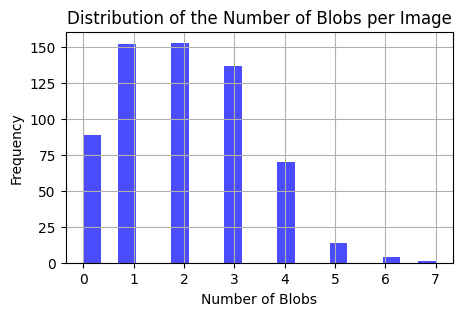

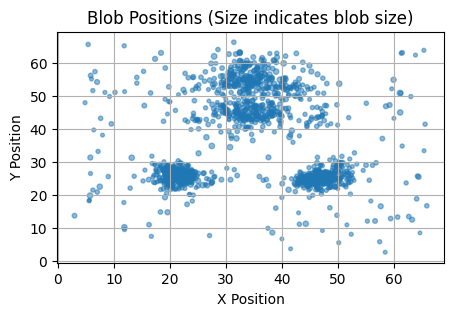

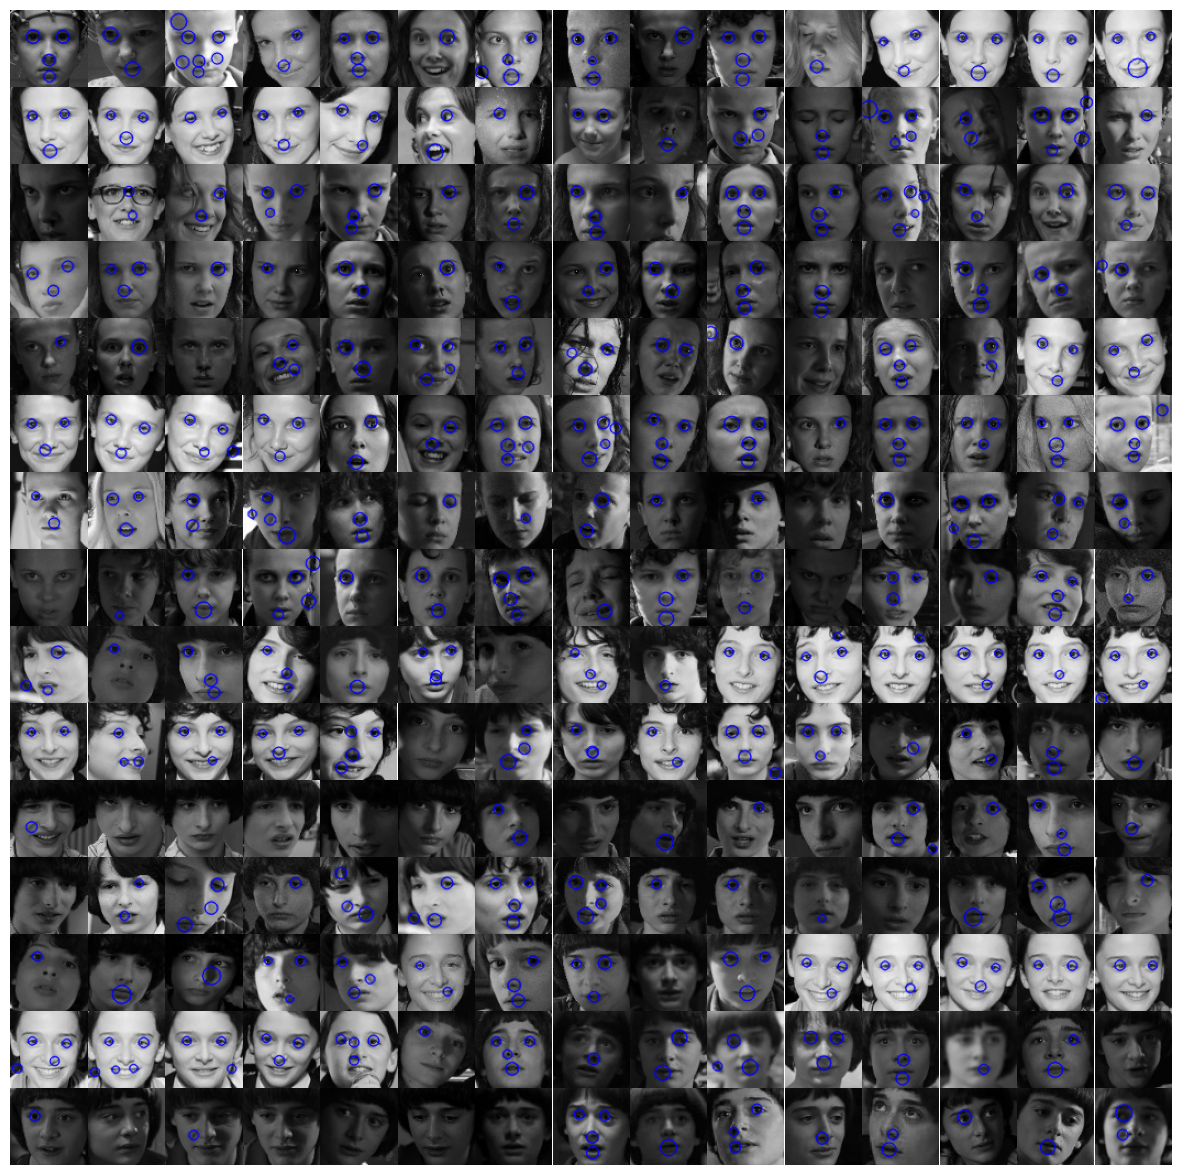

In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Path to the dataset
path = r"C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\x86"
# Path to save images with detected blobs
save_path = r"C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\assignment-2\blob_results"

# Create the save directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Function to collect image paths from the given directory
def images(path):
    found_images = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                found_images.append(os.path.join(root, file))
    return found_images

# Blob detection function with statistics collection and saving images
def detect_blob(image_paths):
    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 30
    params.maxThreshold = 220
    params.filterByArea = True
    params.minArea = 30
    params.maxArea = 200  
    params.filterByCircularity = True
    params.minCircularity = 0.3
    params.filterByConvexity = False
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create a blob detector with the specified parameters
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3:
        detector = cv2.SimpleBlobDetector(params)
    else:
        detector = cv2.SimpleBlobDetector_create(params)

    blob_im = []
    blob_statistics = []  # List to store statistics for each image

    for im_path in image_paths:
        im = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
        if im is None:
            continue

        # Resize the image to (70, 70)
        im = cv2.resize(im, (70, 70))

        keypoints = detector.detect(im)
        im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        blob_im.append(im_with_keypoints)

        

        # Collect blob statistics (number of blobs, sizes, positions)
        num_blobs = len(keypoints)
        blob_sizes = [kp.size for kp in keypoints]  # Size of each blob (diameter)
        blob_positions = [(kp.pt[0], kp.pt[1]) for kp in keypoints]  # (x, y) position of each blob

        # Store statistics for the current image
        blob_statistics.append({
            'image_path': im_path,
            'num_blobs': num_blobs,
            'blob_sizes': blob_sizes,
            'blob_positions': blob_positions
        })

    return blob_im, blob_statistics

# Function to display images in a grid
def display_images_in_grid(images, rows=15, cols=15):
    total_images = rows * cols
    images_to_display = images[:total_images]

    fig, axs = plt.subplots(rows, cols, figsize=(cols, rows), gridspec_kw={'wspace': 0, 'hspace': 0})
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, ax in enumerate(axs.ravel()):
        if i < len(images_to_display):
            ax.imshow(images_to_display[i], cmap='gray')
            ax.axis('off')  
        else:
            ax.axis('off')  

    plt.show()

# Function to generate and display plots and statistics
def plot_and_summarize(blob_statistics):
    num_blobs_per_image = [stat['num_blobs'] for stat in blob_statistics]
    all_blob_sizes = [size for stat in blob_statistics for size in stat['blob_sizes']]
    all_blob_positions = [pos for stat in blob_statistics for pos in stat['blob_positions']]

    avg_num_blobs = np.mean(num_blobs_per_image)
    avg_blob_size = np.mean(all_blob_sizes) if all_blob_sizes else 0
    max_num_blobs = max(num_blobs_per_image)
    min_num_blobs = min(num_blobs_per_image)
    image_with_max_blobs = blob_statistics[num_blobs_per_image.index(max_num_blobs)]['image_path']
    image_with_min_blobs = blob_statistics[num_blobs_per_image.index(min_num_blobs)]['image_path']

    print(f"Average number of blobs per image: {avg_num_blobs}")
    print(f"Average blob size: {avg_blob_size:.2f}")
    print(f"Max number of blobs in an image: {max_num_blobs} (Image: {image_with_max_blobs})")
    print(f"Min number of blobs in an image: {min_num_blobs} (Image: {image_with_min_blobs})")
    
    plt.figure(figsize=(5, 3))
    plt.hist(num_blobs_per_image, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of the Number of Blobs per Image')
    plt.xlabel('Number of Blobs')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    if all_blob_sizes and all_blob_positions:
        x_positions = [pos[0] for pos in all_blob_positions]
        y_positions = [pos[1] for pos in all_blob_positions]

        plt.figure(figsize=(5, 3))
        plt.scatter(x_positions, y_positions, s=all_blob_sizes, alpha=0.5)
        plt.title('Blob Positions (Size indicates blob size)')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.grid(True)
        plt.show()

# Collect image paths
image_paths = images(path)

# Apply blob detection to the collected images and get statistics
blob_detected_images, blob_statistics = detect_blob(image_paths)

# Plot and summarize the statistics
plot_and_summarize(blob_statistics)

# Display blob-detected images in a 15x15 grid
display_images_in_grid(blob_detected_images, rows=15, cols=15)
